In [1]:
from spectral_clustering import *
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt

In [2]:
import warnings

warnings.filterwarnings(
    "ignore", message="KMeans is known to have a memory leak on Windows with MKL"
)

In [3]:
random_state = 1

In [23]:
parameter_grid_knn = {
    "sim_graph_type": ["knn"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0],
    "knn": [5, 8, 10, 15, 20, 30, 40],
    "mutual_knn": [0],
    "epsilon": [0],
}

In [24]:
parameter_grid_mutual_knn = {
    "sim_graph_type": ["mutual_knn"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0],
    "knn": [0],
    "mutual_knn": [5, 8, 10, 15, 20, 30, 40],
    "epsilon": [0],
}

In [6]:
parameter_grid_eps_neighborhood = {
    "sim_graph_type": ["eps_neighbor"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0],
    "knn": [0],
    "mutual_knn": [0],
    "epsilon": [
        0.05,
        0.1,
        0.15,
        0.2,
        0.25,
        0.3,
        0.5,
        0.75,
        1.0,
        1.25,
        1.5,
        2.0,
        4.0,
        8.0,
    ],
}

In [7]:
parameter_grid_fully_connected = {
    "sim_graph_type": ["fully_connect"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.75, 1.0, 2.0],
    "knn": [0],
    "mutual_knn": [0],
    "epsilon": [0],
}

# Different Density Regions

We  start with a dataset that has 3 clusters with different densities. 

In [8]:
blobs_data, blobs_labels = make_blobs(
    n_samples=[500, 50, 50],
    centers=[[0, 0], [5, 5], [5, -5]],
    cluster_std=[2.5, 0.3, 0.3],
    random_state=random_state,
)

distance_matrix = get_distance_matrix_from_data(blobs_data)

In [9]:
best_params_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_knn, random_state=random_state
)
print(best_params_knn)

best_params_mutual_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_mutual_knn, random_state=random_state
)
print(best_params_mutual_knn)

best_params_eps_neighborhood = find_best_params_with_eigengap_grid_search(
    distance_matrix,
    param_grid=parameter_grid_eps_neighborhood,
    random_state=random_state,
)
print(best_params_eps_neighborhood)

best_params_fully_connected = find_best_params_with_eigengap_grid_search(
    distance_matrix,
    param_grid=parameter_grid_fully_connected,
    random_state=random_state,
)
print(best_params_fully_connected)

{'K': 3, 'epsilon': 0, 'knn': 30, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
{'K': 4, 'epsilon': 0, 'knn': 0, 'mutual_knn': 30, 'sigma': 0, 'sim_graph_type': 'mutual_knn'}
{'K': 1, 'epsilon': 8.0, 'knn': 0, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'eps_neighbor'}
{'K': 1, 'epsilon': 0, 'knn': 0, 'mutual_knn': 0, 'sigma': 2.0, 'sim_graph_type': 'fully_connect'}


c:\Users\Владимир\OneDrive\Documents\Mathematik\Statistical ML\Project\spectral_clustering\spectral_clustering.py:424: ComplexWarning: Casting complex values to real discards the imaginary part
  eigs = np.asarray(eigs, dtype=float)
c:\Users\Владимир\OneDrive\Documents\Mathematik\Statistical ML\Project\spectral_clustering\spectral_clustering.py:426: RuntimeWarning: divide by zero encountered in log
  vals = np.log(np.abs(eigs[:k]))


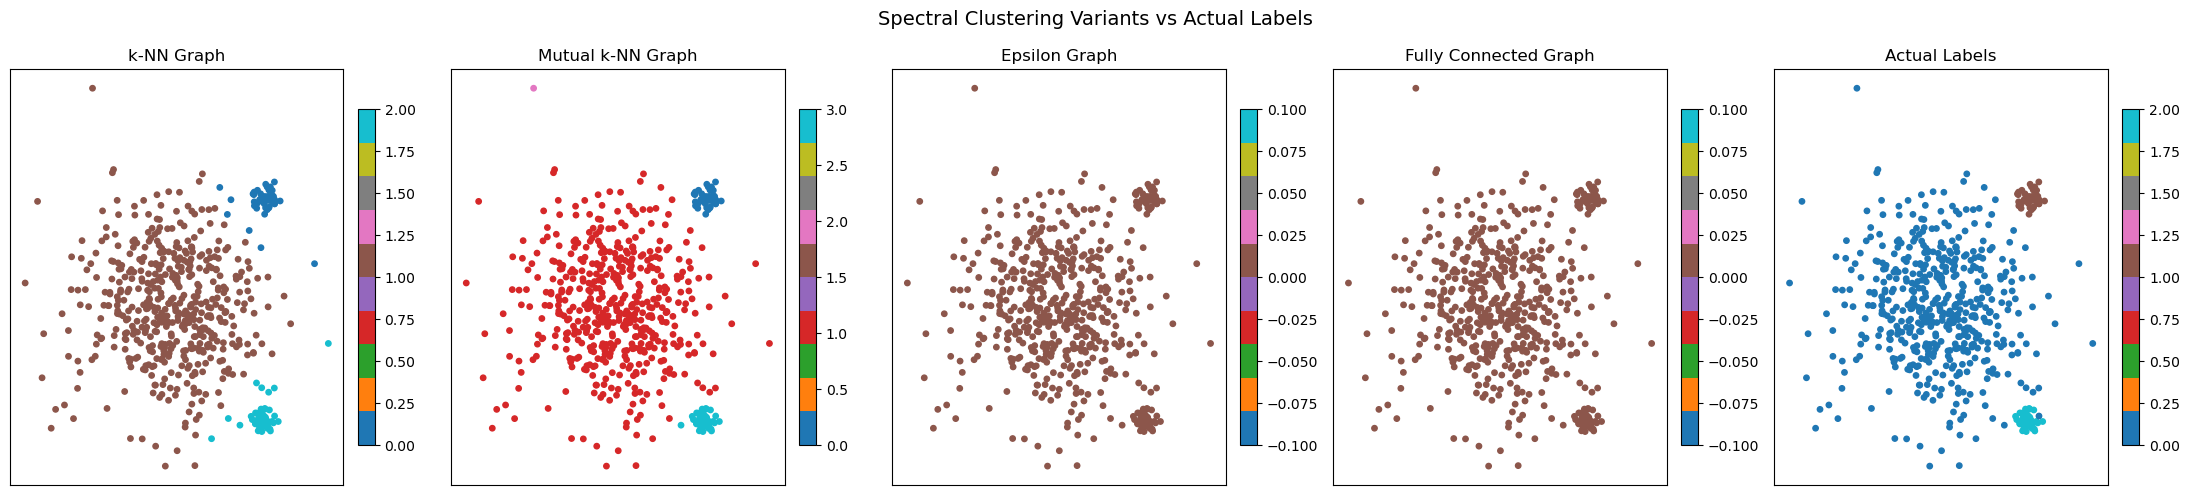

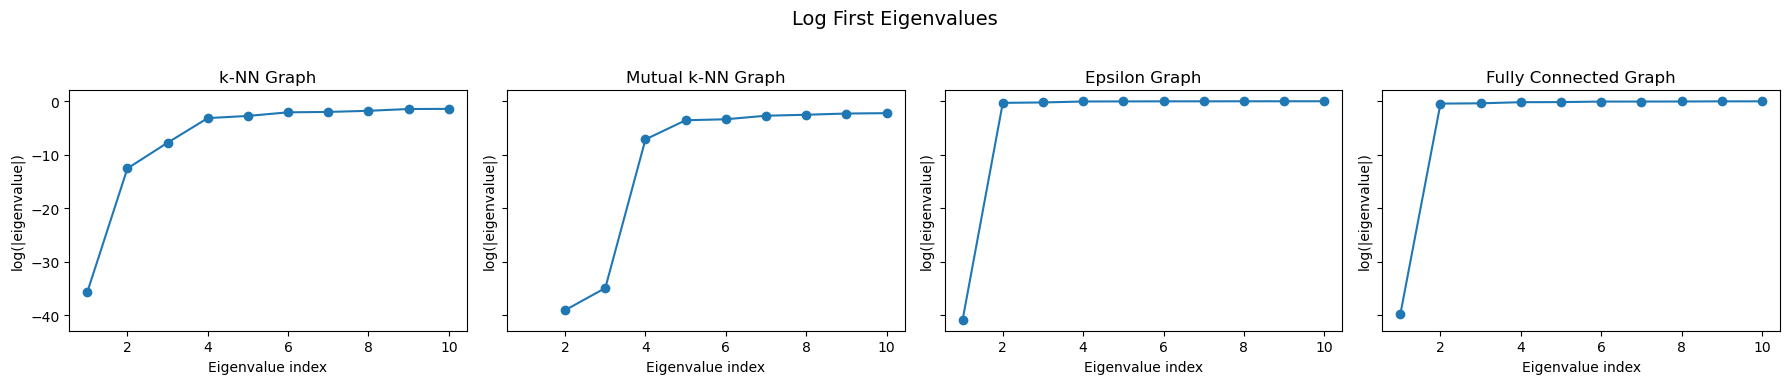

In [10]:
similarity_matrix_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_knn["sim_graph_type"],
    knn=best_params_knn["knn"],
)

res_knn, eigenvectors_knn, eigenvalues_knn = Spectral_Clustering(
    similarity_matrix_knn,
    K=best_params_knn["K"],
    random_state=random_state,
)

similarity_matrix_mutual_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_mutual_knn["sim_graph_type"],
    mutual_knn=best_params_mutual_knn["mutual_knn"],
)

res_mutual_knn, eigenvectors_mutual_knn, eigenvalues_mutual_knn = Spectral_Clustering(
    similarity_matrix_mutual_knn,
    K=best_params_mutual_knn["K"],
    random_state=random_state,
)

similarity_matrix_eps_neighborhood = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_eps_neighborhood["sim_graph_type"],
    epsilon=best_params_eps_neighborhood["epsilon"],
)

res_eps_neighborhood, eigenvectors_eps_neighborhood, eigenvalues_eps_neighborhood = (
    Spectral_Clustering(
        similarity_matrix_eps_neighborhood,
        K=best_params_eps_neighborhood["K"],
        random_state=random_state,
    )
)

similarity_matrix_fully_connected = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_fully_connected["sim_graph_type"],
    sigma=best_params_fully_connected["sigma"],
)

res_fully_connected, eigenvectors_fully_connected, eigenvalues_fully_connected = (
    Spectral_Clustering(
        similarity_matrix_fully_connected,
        K=best_params_fully_connected["K"],
        random_state=random_state,
    )
)

plots = [
    ("k-NN Graph", res_knn.labels_),
    ("Mutual k-NN Graph", res_mutual_knn.labels_),
    ("Epsilon Graph", res_eps_neighborhood.labels_),
    ("Fully Connected Graph", res_fully_connected.labels_),
    ("Actual Labels", blobs_labels),
]

fig, axes = plt.subplots(1, 5, figsize=(22, 5), sharex=True, sharey=True)
for ax, (title, labels) in zip(axes, plots):
    scatter = ax.scatter(
        blobs_data[:, 0],
        blobs_data[:, 1],
        c=labels,
        s=15,
        cmap="tab10",
    )
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

fig.suptitle("Spectral Clustering Variants vs Actual Labels", fontsize=14)
fig.tight_layout()

eigen_list = [
    eigenvalues_knn,
    eigenvalues_mutual_knn,
    eigenvalues_eps_neighborhood,
    eigenvalues_fully_connected,
]
titles = ["k-NN Graph", "Mutual k-NN Graph", "Epsilon Graph", "Fully Connected Graph"]

plot_eigenvalues(eigen_list, titles)

So, as expected, epsilon neighborhood and RBF kernel similarities perform badly, because we have different density regions and also the less dense one is overlapping with the denser regions, so no global density related parameter ($\epsilon$ / $\sigma$) delivers a good result. Mutual KNN suggests 4 clusters, one of which is a single point and an outlier (top left corner)

# Same Density, Close Clusters

In [11]:
blobs_data, blobs_labels = make_blobs(
    n_samples=500, centers=3, cluster_std=0.8, random_state=random_state
)

# Apply a transformation to make the blobs anisotropic (elongated)
transformation = [[1.8, 1.5], [1.5, 0.5]]
blobs_data = np.dot(blobs_data, transformation)

distance_matrix = get_distance_matrix_from_data(blobs_data)

We use the same parameter grid

In [12]:
best_params_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_knn, random_state=random_state
)
print(best_params_knn)

best_params_mutual_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_mutual_knn, random_state=random_state
)
print(best_params_mutual_knn)

best_params_eps_neighborhood = find_best_params_with_eigengap_grid_search(
    distance_matrix,
    param_grid=parameter_grid_eps_neighborhood,
    random_state=random_state,
)
print(best_params_eps_neighborhood)

best_params_fully_connected = find_best_params_with_eigengap_grid_search(
    distance_matrix,
    param_grid=parameter_grid_fully_connected,
    random_state=random_state,
)
print(best_params_fully_connected)

{'K': 3, 'epsilon': 0, 'knn': 20, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
{'K': 2, 'epsilon': 0, 'knn': 0, 'mutual_knn': 40, 'sigma': 0, 'sim_graph_type': 'mutual_knn'}
{'K': 2, 'epsilon': 8.0, 'knn': 0, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'eps_neighbor'}
{'K': 2, 'epsilon': 0, 'knn': 0, 'mutual_knn': 0, 'sigma': 1.0, 'sim_graph_type': 'fully_connect'}


c:\Users\Владимир\OneDrive\Documents\Mathematik\Statistical ML\Project\spectral_clustering\spectral_clustering.py:424: ComplexWarning: Casting complex values to real discards the imaginary part
  eigs = np.asarray(eigs, dtype=float)


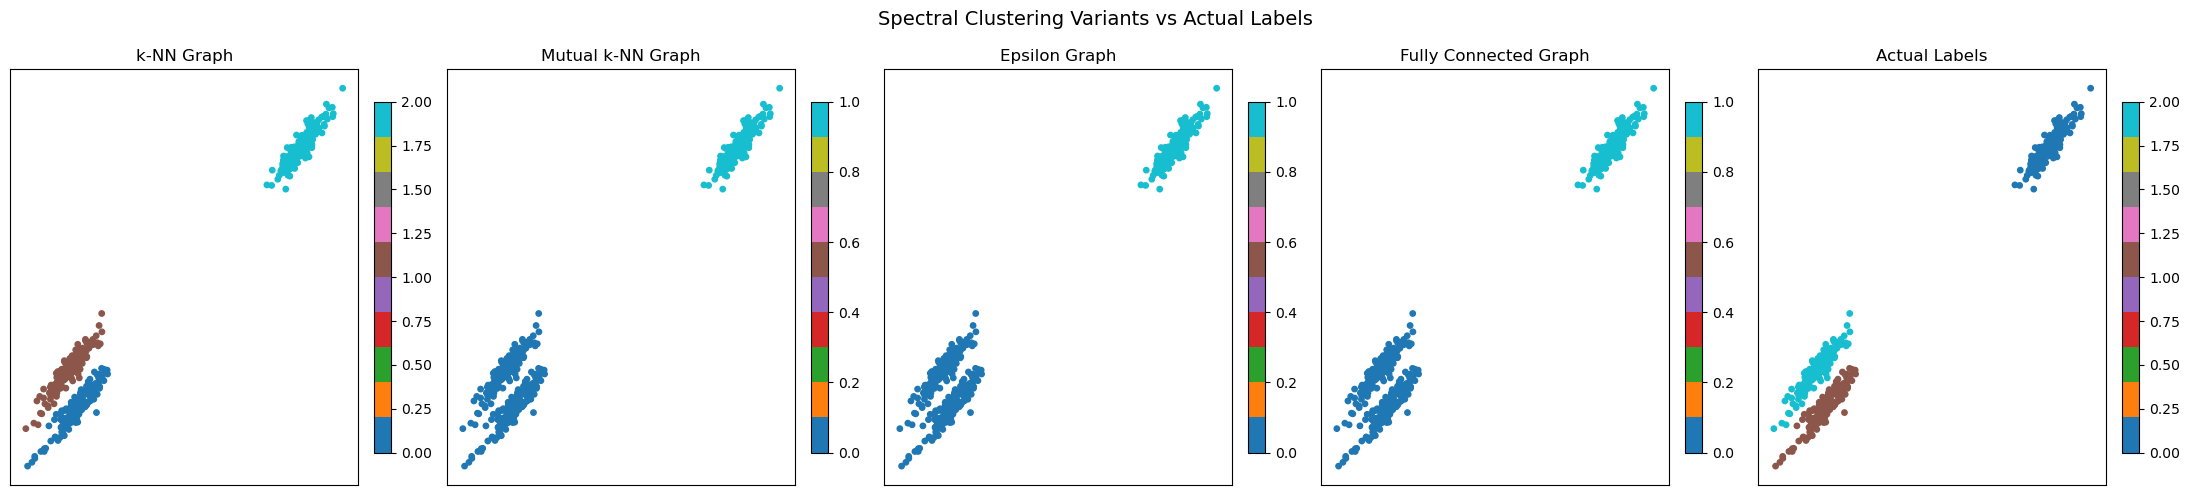

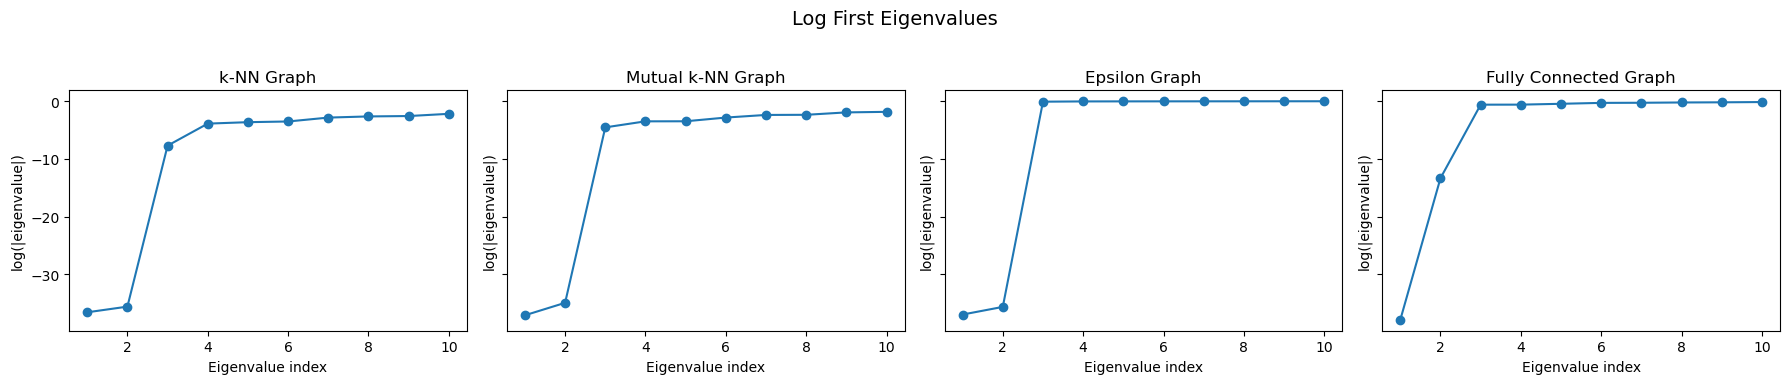

In [13]:
similarity_matrix_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_knn["sim_graph_type"],
    knn=best_params_knn["knn"],
)

res_knn, eigenvectors_knn, eigenvalues_knn = Spectral_Clustering(
    similarity_matrix_knn,
    K=best_params_knn["K"],
    random_state=random_state,
)

similarity_matrix_mutual_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_mutual_knn["sim_graph_type"],
    mutual_knn=best_params_mutual_knn["mutual_knn"],
)

res_mutual_knn, eigenvectors_mutual_knn, eigenvalues_mutual_knn = Spectral_Clustering(
    similarity_matrix_mutual_knn,
    K=best_params_mutual_knn["K"],
    random_state=random_state,
)

similarity_matrix_eps_neighborhood = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_eps_neighborhood["sim_graph_type"],
    epsilon=best_params_eps_neighborhood["epsilon"],
)

res_eps_neighborhood, eigenvectors_eps_neighborhood, eigenvalues_eps_neighborhood = (
    Spectral_Clustering(
        similarity_matrix_eps_neighborhood,
        K=best_params_eps_neighborhood["K"],
        random_state=random_state,
    )
)

similarity_matrix_fully_connected = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_fully_connected["sim_graph_type"],
    sigma=best_params_fully_connected["sigma"],
)

res_fully_connected, eigenvectors_fully_connected, eigenvalues_fully_connected = (
    Spectral_Clustering(
        similarity_matrix_fully_connected,
        K=best_params_fully_connected["K"],
        random_state=random_state,
    )
)

plots = [
    ("k-NN Graph", res_knn.labels_),
    ("Mutual k-NN Graph", res_mutual_knn.labels_),
    ("Epsilon Graph", res_eps_neighborhood.labels_),
    ("Fully Connected Graph", res_fully_connected.labels_),
    ("Actual Labels", blobs_labels),
]

fig, axes = plt.subplots(1, 5, figsize=(22, 5), sharex=True, sharey=True)
for ax, (title, labels) in zip(axes, plots):
    scatter = ax.scatter(
        blobs_data[:, 0],
        blobs_data[:, 1],
        c=labels,
        s=15,
        cmap="tab10",
    )
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

fig.suptitle("Spectral Clustering Variants vs Actual Labels", fontsize=14)
fig.tight_layout()

eigen_list = [
    eigenvalues_knn,
    eigenvalues_mutual_knn,
    eigenvalues_eps_neighborhood,
    eigenvalues_fully_connected,
]
titles = ["k-NN Graph", "Mutual k-NN Graph", "Epsilon Graph", "Fully Connected Graph"]

plot_eigenvalues(eigen_list, titles)

KNN similarity was lucky and got 3 clusters as the optimal value, even though the plot suggests that 2 might be more suitable. However, if we explicitly set that we want 3 clusters, mutual KNN performs well as well, as we can see below. Epsilon neighborhood and RBF similarities are bad once again due to the fact that 2 clusters are very close to each other and the two struggle to distinguish them

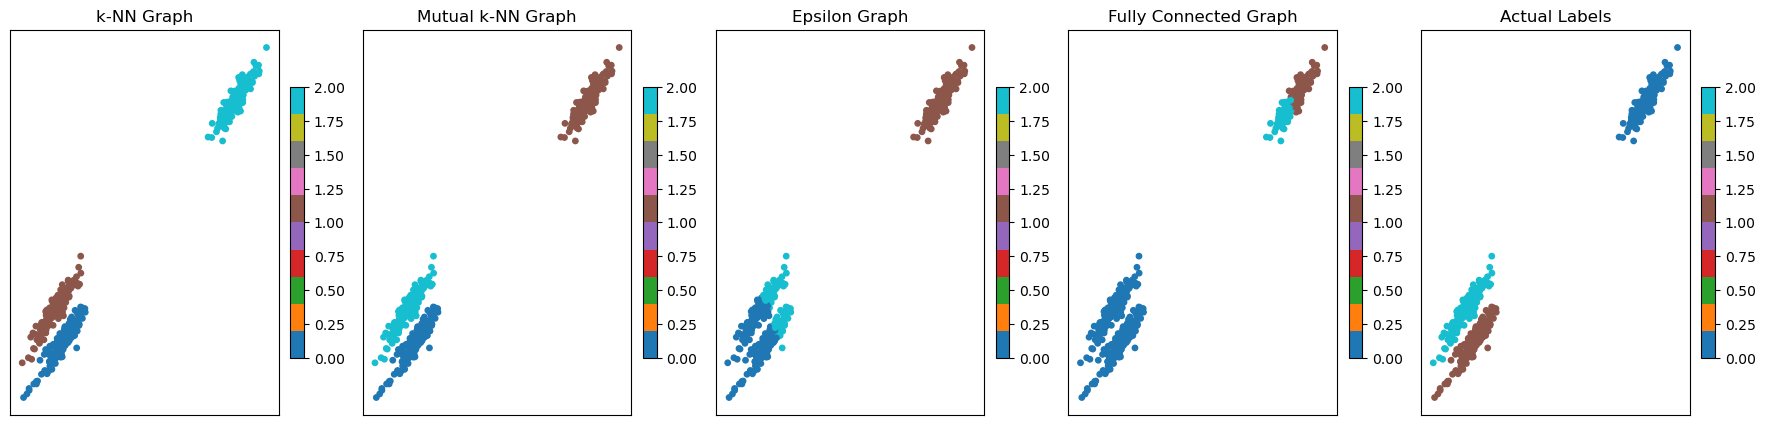

In [14]:
similarity_matrix_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_knn["sim_graph_type"],
    knn=best_params_knn["knn"],
)

res_knn, eigenvectors_knn, eigenvalues_knn = Spectral_Clustering(
    similarity_matrix_knn,
    K=3,
    random_state=random_state,
)

similarity_matrix_mutual_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_mutual_knn["sim_graph_type"],
    mutual_knn=best_params_mutual_knn["mutual_knn"],
)

res_mutual_knn, eigenvectors_mutual_knn, eigenvalues_mutual_knn = Spectral_Clustering(
    similarity_matrix_mutual_knn,
    K=3,
    random_state=random_state,
)

similarity_matrix_eps_neighborhood = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_eps_neighborhood["sim_graph_type"],
    epsilon=best_params_eps_neighborhood["epsilon"],
)

res_eps_neighborhood, eigenvectors_eps_neighborhood, eigenvalues_eps_neighborhood = (
    Spectral_Clustering(
        similarity_matrix_eps_neighborhood,
        K=3,
        random_state=random_state,
    )
)

similarity_matrix_fully_connected = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_fully_connected["sim_graph_type"],
    sigma=best_params_fully_connected["sigma"],
)

res_fully_connected, eigenvectors_fully_connected, eigenvalues_fully_connected = (
    Spectral_Clustering(
        similarity_matrix_fully_connected,
        K=3,
        random_state=random_state,
    )
)

plots = [
    ("k-NN Graph", res_knn.labels_),
    ("Mutual k-NN Graph", res_mutual_knn.labels_),
    ("Epsilon Graph", res_eps_neighborhood.labels_),
    ("Fully Connected Graph", res_fully_connected.labels_),
    ("Actual Labels", blobs_labels),
]

fig, axes = plt.subplots(1, 5, figsize=(22, 5), sharex=True, sharey=True)
for ax, (title, labels) in zip(axes, plots):
    scatter = ax.scatter(
        blobs_data[:, 0],
        blobs_data[:, 1],
        c=labels,
        s=15,
        cmap="tab10",
    )
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

The number of clusters, in the end, might not be equal to what the eigengap suggests. It is just a heuristic

# Two Moons

In [25]:
moons_data, moons_labels = make_moons(n_samples=500, noise=0.05)

distance_matrix = get_distance_matrix_from_data(moons_data)

In [26]:
best_params_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_knn, random_state=random_state
)
print(best_params_knn)

best_params_mutual_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_mutual_knn, random_state=random_state
)
print(best_params_mutual_knn)

best_params_eps_neighborhood = find_best_params_with_eigengap_grid_search(
    distance_matrix,
    param_grid=parameter_grid_eps_neighborhood,
    random_state=random_state,
)
print(best_params_eps_neighborhood)

best_params_fully_connected = find_best_params_with_eigengap_grid_search(
    distance_matrix,
    param_grid=parameter_grid_fully_connected,
    random_state=random_state,
)
print(best_params_fully_connected)

{'K': 2, 'epsilon': 0, 'knn': 40, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
{'K': 2, 'epsilon': 0, 'knn': 0, 'mutual_knn': 40, 'sigma': 0, 'sim_graph_type': 'mutual_knn'}
{'K': 1, 'epsilon': 4.0, 'knn': 0, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'eps_neighbor'}
{'K': 1, 'epsilon': 0, 'knn': 0, 'mutual_knn': 0, 'sigma': 2.0, 'sim_graph_type': 'fully_connect'}


c:\Users\Владимир\OneDrive\Documents\Mathematik\Statistical ML\Project\spectral_clustering\spectral_clustering.py:424: ComplexWarning: Casting complex values to real discards the imaginary part
  eigs = np.asarray(eigs, dtype=float)


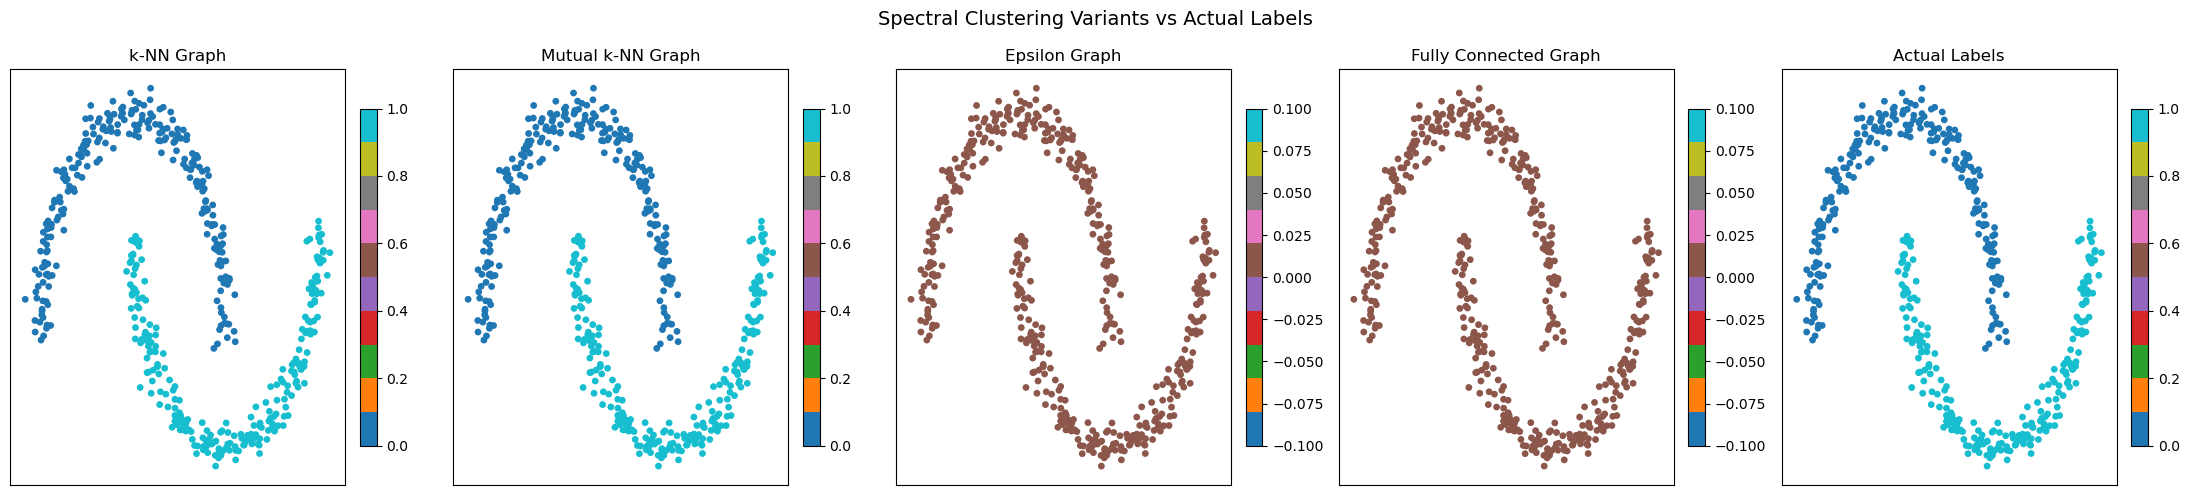

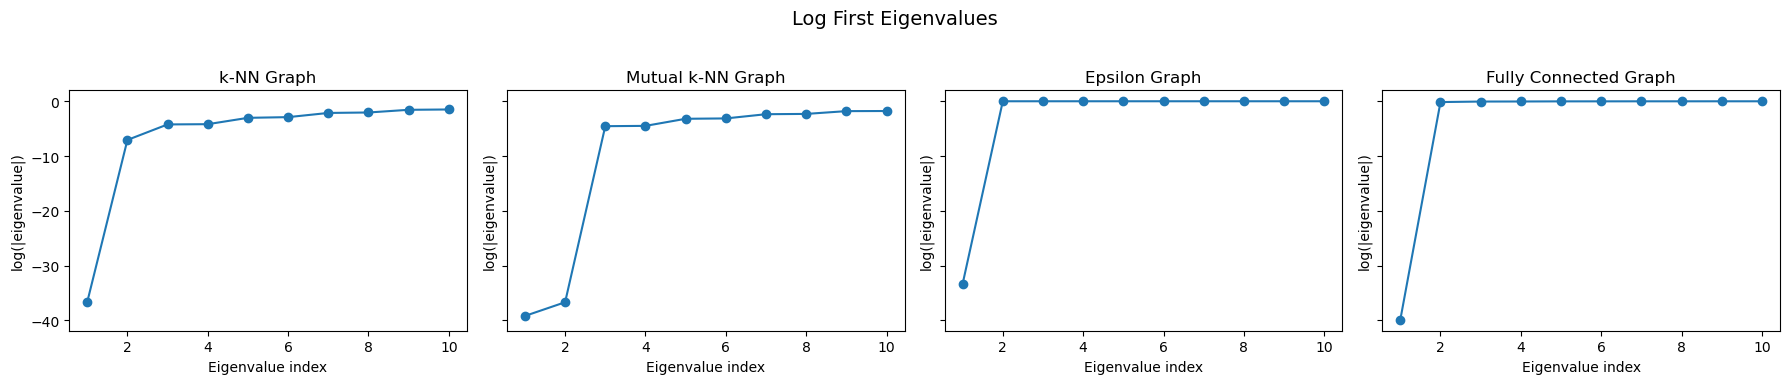

In [39]:
similarity_matrix_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_knn["sim_graph_type"],
    knn=best_params_knn["knn"],
)

res_knn, eigenvectors_knn, eigenvalues_knn = Spectral_Clustering(
    similarity_matrix_knn,
    K=best_params_knn["K"],
    random_state=random_state,
)

similarity_matrix_mutual_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_mutual_knn["sim_graph_type"],
    mutual_knn=best_params_mutual_knn["mutual_knn"],
)

res_mutual_knn, eigenvectors_mutual_knn, eigenvalues_mutual_knn = Spectral_Clustering(
    similarity_matrix_mutual_knn,
    K=best_params_mutual_knn["K"],
    random_state=random_state,
)

similarity_matrix_eps_neighborhood = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_eps_neighborhood["sim_graph_type"],
    epsilon=best_params_eps_neighborhood["epsilon"],
)

res_eps_neighborhood, eigenvectors_eps_neighborhood, eigenvalues_eps_neighborhood = (
    Spectral_Clustering(
        similarity_matrix_eps_neighborhood,
        K=best_params_eps_neighborhood["K"],
        random_state=random_state,
    )
)

similarity_matrix_fully_connected = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_fully_connected["sim_graph_type"],
    sigma=best_params_fully_connected["sigma"],
)

res_fully_connected, eigenvectors_fully_connected, eigenvalues_fully_connected = (
    Spectral_Clustering(
        similarity_matrix_fully_connected,
        K=best_params_fully_connected["K"],
        random_state=random_state,
    )
)

plots = [
    ("k-NN Graph", res_knn.labels_),
    ("Mutual k-NN Graph", res_mutual_knn.labels_),
    ("Epsilon Graph", res_eps_neighborhood.labels_),
    ("Fully Connected Graph", res_fully_connected.labels_),
    ("Actual Labels", moons_labels),
]

fig, axes = plt.subplots(1, 5, figsize=(22, 5), sharex=True, sharey=True)
for ax, (title, labels) in zip(axes, plots):
    scatter = ax.scatter(
        moons_data[:, 0],
        moons_data[:, 1],
        c=labels,
        s=15,
        cmap="tab10",
    )
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

fig.suptitle("Spectral Clustering Variants vs Actual Labels", fontsize=14)
fig.tight_layout()

eigen_list = [
    eigenvalues_knn,
    eigenvalues_mutual_knn,
    eigenvalues_eps_neighborhood,
    eigenvalues_fully_connected,
]
titles = ["k-NN Graph", "Mutual k-NN Graph", "Epsilon Graph", "Fully Connected Graph"]

plot_eigenvalues(eigen_list, titles)

The parameters we have found seem to be pretty good for the knn case. However, they are pretty bad for the other two.

c:\Users\Владимир\OneDrive\Documents\Mathematik\Statistical ML\Project\spectral_clustering\spectral_clustering.py:424: ComplexWarning: Casting complex values to real discards the imaginary part
  eigs = np.asarray(eigs, dtype=float)


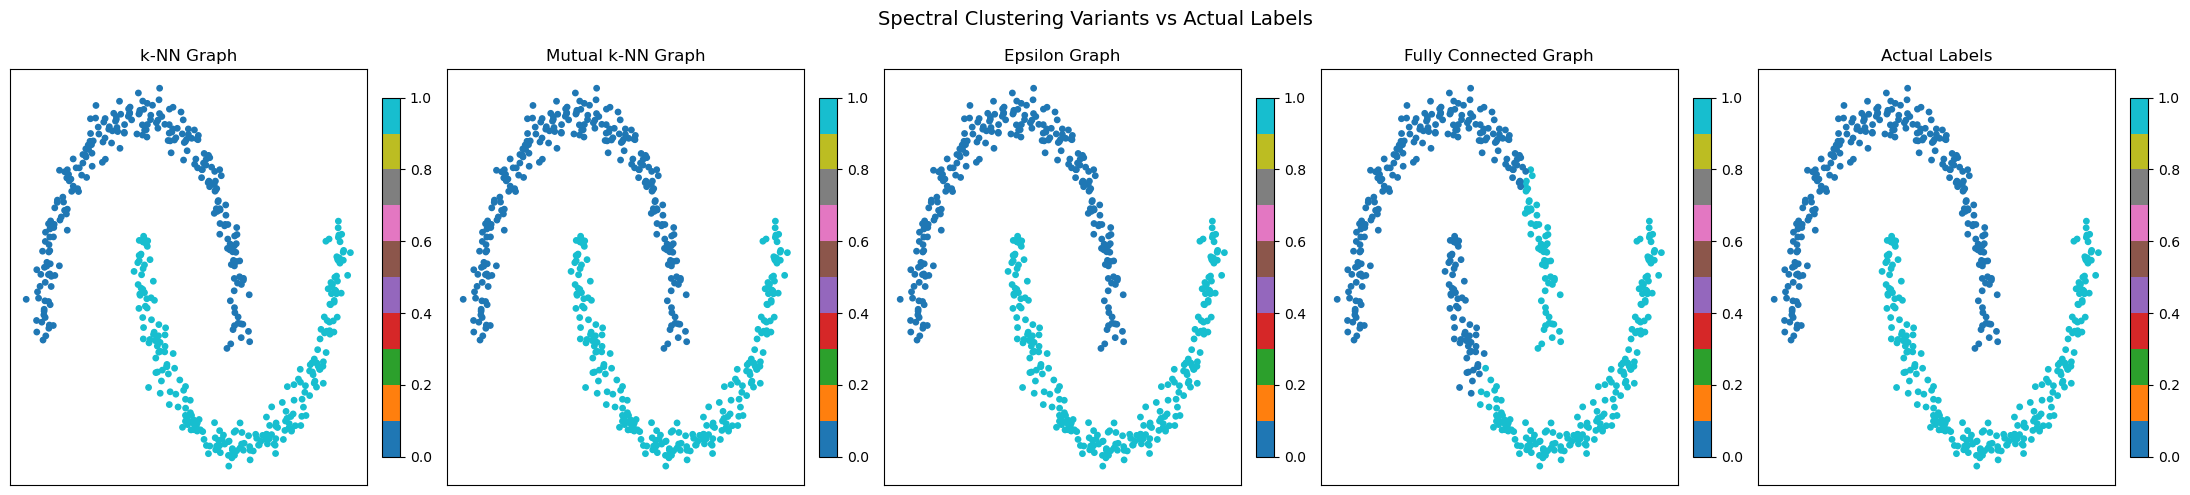

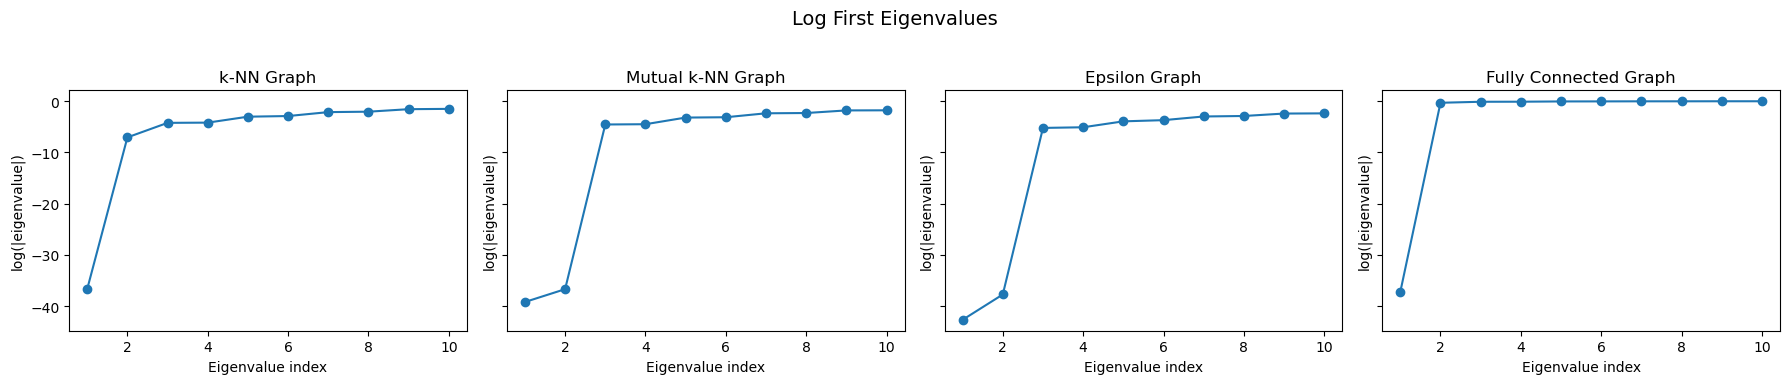

In [38]:
similarity_matrix_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_knn["sim_graph_type"],
    knn=best_params_knn["knn"],
)

res_knn, eigenvectors_knn, eigenvalues_knn = Spectral_Clustering(
    similarity_matrix_knn,
    K=2,
    random_state=random_state,
)

similarity_matrix_mutual_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_mutual_knn["sim_graph_type"],
    mutual_knn=best_params_mutual_knn["mutual_knn"],
)

res_mutual_knn, eigenvectors_mutual_knn, eigenvalues_mutual_knn = Spectral_Clustering(
    similarity_matrix_mutual_knn,
    K=2,
    random_state=random_state,
)

similarity_matrix_eps_neighborhood = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_eps_neighborhood["sim_graph_type"],
    epsilon=0.2,
)

res_eps_neighborhood, eigenvectors_eps_neighborhood, eigenvalues_eps_neighborhood = (
    Spectral_Clustering(
        similarity_matrix_eps_neighborhood,
        K=2,
        random_state=random_state,
    )
)

similarity_matrix_fully_connected = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_fully_connected["sim_graph_type"],
    sigma=1,
)

res_fully_connected, eigenvectors_fully_connected, eigenvalues_fully_connected = (
    Spectral_Clustering(
        similarity_matrix_fully_connected,
        K=2,
        random_state=random_state,
    )
)

plots = [
    ("k-NN Graph", res_knn.labels_),
    ("Mutual k-NN Graph", res_mutual_knn.labels_),
    ("Epsilon Graph", res_eps_neighborhood.labels_),
    ("Fully Connected Graph", res_fully_connected.labels_),
    ("Actual Labels", moons_labels),
]

fig, axes = plt.subplots(1, 5, figsize=(22, 5), sharex=True, sharey=True)
for ax, (title, labels) in zip(axes, plots):
    scatter = ax.scatter(
        moons_data[:, 0],
        moons_data[:, 1],
        c=labels,
        s=15,
        cmap="tab10",
    )
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)

fig.suptitle("Spectral Clustering Variants vs Actual Labels", fontsize=14)
fig.tight_layout()

eigen_list = [
    eigenvalues_knn,
    eigenvalues_mutual_knn,
    eigenvalues_eps_neighborhood,
    eigenvalues_fully_connected,
]
titles = ["k-NN Graph", "Mutual k-NN Graph", "Epsilon Graph", "Fully Connected Graph"]

plot_eigenvalues(eigen_list, titles)

We can make eps neighborhood perform well, but the RBF similarity doesn't work for this kind of data